# Machine Learning I

Machine learning (ML) is a subfield of artificial intelligence (AI) that focuses on the development of algorithms and models that enable computers to learn and improve their performance on a task without being explicitly programmed. ML relies on training data to identify patterns and relationships, which are then used to make predictions or decisions. The main types of ML are supervised learning, unsupervised learning, and reinforcement learning. Supervised learning involves learning from labeled data, while unsupervised learning identifies patterns in unlabeled data. Reinforcement learning relies on trial and error, with agents learning to perform tasks through a system of rewards and penalties. Applications of ML span numerous industries, including healthcare, finance, marketing, and self-driving cars.

To dip our toes into the world of machine learning, we will use the scikit-learn package (which we've already used for doing regressionss). Scikit-learn is an open-source Python library that provides a wide range of machine learning algorithms, tools, and utilities for data analysis and predictive modeling. Built on top of NumPy, SciPy, and Matplotlib, scikit-learn is a versatile and relatively user-friendly package that will allow us to experiment with different machine learning techniques.

Machine learning is not magic. In fact, we've already used one of the most fundemental machine learning algorithms there is, which is a linear predictor, a.k.a. a linear regression model.

A plain old linear regression has one of the primary characteristics of all machine learning algorithms, which is that it learns something, in this case a slope and a y-intercept, from the data.

All an ordinary regression is missing is one of the other primary characteristics of machine learning algorithms, which is the application to data that was **not** part of the learning process. 

## Splitting data into *training* and *test* sets.

Machine learning can be described as the process of taking a general algorithm, such as "there is a linear relationship between median income in a city and the median house price", into a specific relationship â€“ $price = a*income + b$ with learned values for $a$ and $b$, that can be used to predict the median house prices for *other* cities - cities that our algorithm has not encountered before.

In order to prove our algorithm works, that is, to prove it is good enough to predict or classify new data, we hold back some data in the original data set as "test" data. We then teach our algorithm using the remaining "training" data. Once our algorithm is trained, we try it out on the test data to see how well it performs on data it has never encountered before.

Put in other words, the idea behind splitting data into test and training sets is to evaluate the performance and generalizability of a machine learning model. This division allows us to train the model on one subset of the data (the training set) and then test its performance on unseen data (the test set). The process helps to ensure that the model is not overfitting and can make accurate predictions when presented with new, unseen data.

Here are the key reasons for splitting data into test and training sets:

Model evaluation: By testing the model on unseen data, we can evaluate its performance and reliability more objectively. This evaluation helps us understand how well the model generalizes beyond the specific examples it was trained on.

Overfitting prevention: Overfitting occurs when a model learns the noise or random fluctuations in the training data, resulting in poor performance on new data. By using a separate test set, we can identify if the model is overfitting and adjust its complexity accordingly.

Model selection: In practice, there are often multiple models or algorithms to choose from when solving a particular problem. Splitting the data allows us to compare the performance of different models on the same test set and choose the one that performs best.

To ensure a fair evaluation, it's essential to randomly split the data into training and test sets, maintaining the original distribution of the target variable. In practice, the split ratio varies depending on the dataset size and problem domain, with common ratios being 70% training / 30% test or 80% training / 20% test. For smaller datasets, techniques such as cross-validation can be used to make better use of the limited data available.

## Linear Predictor

Here, we will revisit the linear regression from a machine learning standpoint.

Mean Squared Error: 234.46
R^2 Score: 0.87


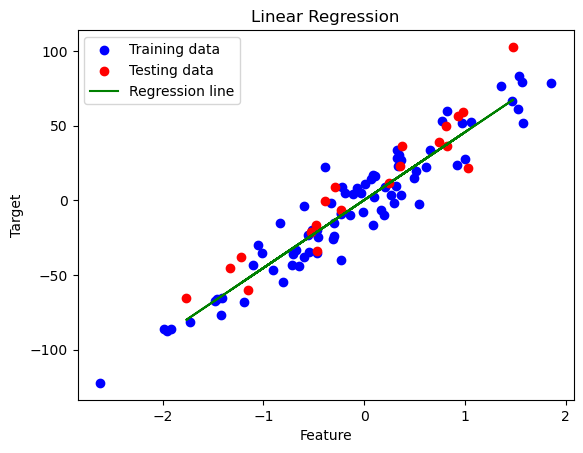

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic regression dataset
n_samples = 100
n_features = 1
n_targets = 1

X, y = make_regression(n_samples=n_samples, n_features=n_features, n_targets=n_targets, noise=15, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualize the regression line
plt.scatter(X_train, y_train, c='blue', label='Training data')
plt.scatter(X_test, y_test, c='red', label='Testing data')
plt.plot(X_test, y_pred, c='green', label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Linear Regression')
plt.show()


## Classification

### Nearest Neighbor

Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45

Accuracy Score: 75.56%


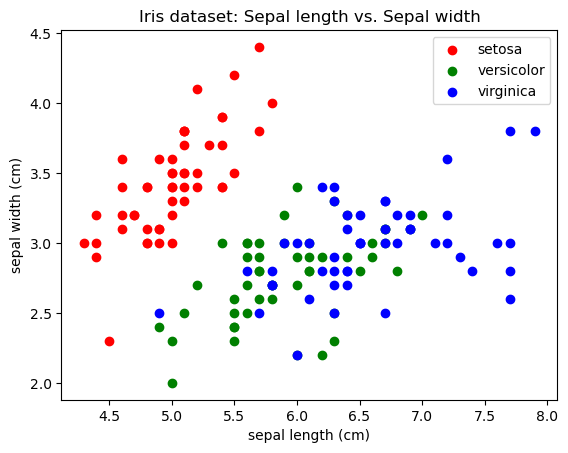

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the K-Nearest Neighbors classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier using the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the classifier's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Create a scatter plot of the first two features with color indicating category
colors = ['red', 'green', 'blue']
species = iris.target_names

for i, color, target_name in zip(range(3), colors, species):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=target_name)

plt.xlabel(iris.feature_names[0])  # Sepal length
plt.ylabel(iris.feature_names[1])  # Sepal width
plt.legend(loc="upper right")
plt.title("Iris dataset: Sepal length vs. Sepal width")
plt.show()


In scikit-learn, the classification_report function provides a comprehensive summary of a classifier's performance in terms of various evaluation metrics. It returns a formatted string that includes the precision, recall, F1-score, and support for each class, as well as their average (weighted by support) values. The classification_report is particularly useful for multi-class classification problems, as it helps assess the model's performance for each class individually.

Here's a brief explanation of the metrics included in the classification report:

Precision: Precision is the ratio of true positive predictions to the sum of true positive and false positive predictions. It measures the classifier's ability to correctly identify positive instances out of all instances predicted as positive. A high precision indicates a low false positive rate.

Recall (Sensitivity): Recall is the ratio of true positive predictions to the sum of true positive and false negative predictions. It measures the classifier's ability to identify all the positive instances. A high recall indicates a low false negative rate.

F1-score: The F1-score is the harmonic mean of precision and recall, and it provides a single value that balances both metrics. It ranges from 0 (worst) to 1 (best), with a higher F1-score indicating better overall performance.

Support: Support is the number of actual occurrences of each class in the dataset. It helps interpret the results of the other metrics by providing context about the class distribution.

Accuracy: Proportion of correctly labeled observations.

The classification report also provides macro and weighted averages for the precision, recall, and F1-score:

Macro Average: The macro average computes the arithmetic mean of the metric scores for each class, without considering the class distribution. It treats all classes equally, which may not be ideal for imbalanced datasets.
Weighted Average: The weighted average computes the average of the metric scores for each class, weighted by the support of each class. This approach accounts for class imbalance and provides a more representative overall performance metric.

### Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification and regression tasks. It works by finding the optimal hyperplane (or decision boundary) that best separates the data into different classes or predicts continuous values. The key concept behind SVM is to maximize the margin between classes, which is defined as the distance between the decision boundary and the nearest data points from each class. These nearest points are called support vectors, and they determine the position and orientation of the hyperplane.

SVM can handle both linearly separable and non-linearly separable data. For linearly separable data, the algorithm finds a straight-line hyperplane that best separates the classes. However, for non-linearly separable data, SVM uses a technique called the kernel trick. The kernel trick involves transforming the input data into a higher-dimensional space where it becomes linearly separable, allowing the SVM to find the optimal separating hyperplane.

Here's a step-by-step overview of how SVM works:

Choose a kernel function: Select an appropriate kernel function (e.g., linear, polynomial, or radial basis function) based on the data's nature and the problem requirements. This function will be used to map the data into a higher-dimensional space if necessary.
Transform the data: If using a non-linear kernel, apply the chosen kernel function to transform the input data into a higher-dimensional space.
Determine the optimal hyperplane: Find the hyperplane that best separates the classes by maximizing the margin between them. This is achieved by minimizing a cost function that considers both the margin size and the classification error.
Identify support vectors: Find the data points that lie closest to the decision boundary, as they are critical in defining the optimal hyperplane.
Make predictions: For a new input data point, use the kernel function and the support vectors to determine which side of the decision boundary it lies on (for classification) or predict the continuous value (for regression).
SVM is known for its effectiveness in high-dimensional spaces and robustness against overfitting, making it suitable for various applications, including image classification, text categorization, and bioinformatics.

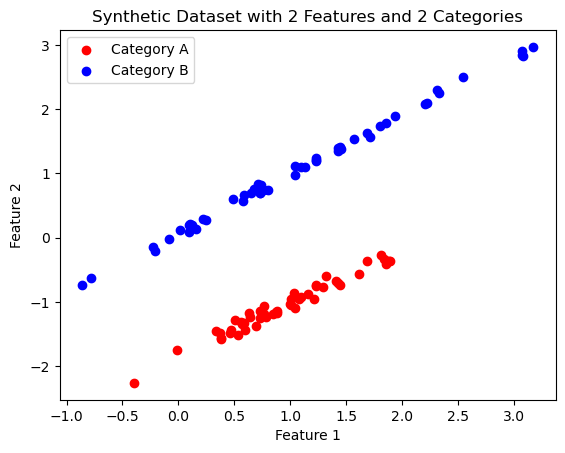

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create a synthetic dataset with 2 features and 2 classes
n_samples = 100
n_features = 2
n_classes = 2

X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Separate the data into categories A and B
category_A = X[y == 0]
category_B = X[y == 1]

# Visualize the data
plt.scatter(category_A[:, 0], category_A[:, 1], c='r', label='Category A')
plt.scatter(category_B[:, 0], category_B[:, 1], c='b', label='Category B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Synthetic Dataset with 2 Features and 2 Categories')
plt.show()


---

Full meal deal.

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[13  0]
 [ 0  7]]


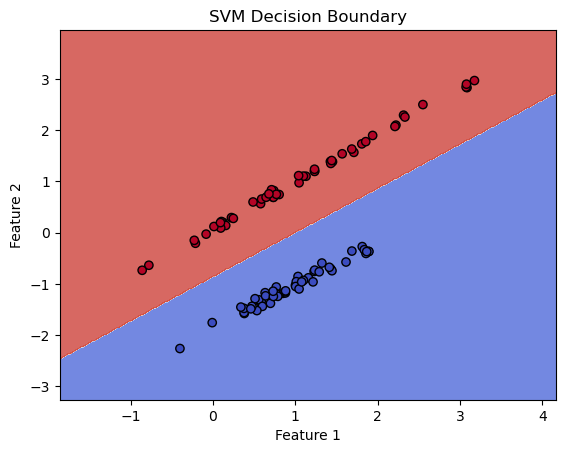

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a synthetic dataset with 2 features and 2 classes
n_samples = 100
n_features = 2
n_classes = 2

X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Decision Boundary')
plt.show()


You can experiment with different kernel functions (e.g., 'poly', 'rbf', 'sigmoid') and other hyperparameters to see how they affect the SVM's performance.